# Data Visualization exercise

In [1]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [3]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [4]:
### .info() to provide information on the data
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [6]:
### What to do with '-' values?
## Change "-" into NAs
import numpy as np

euk.replace('-', np.nan, inplace=True)

euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [9]:
## Look only look at reptile data using class 'Reptiles'
reptile_data = euk[euk['Class'] == 'Reptiles']

reptile_data

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
282,Anolis carolinensis,Animals,Reptiles,1799.14,40.8238,22092,34827,2007,Chromosome
543,Sphenodon punctatus,Animals,Reptiles,4272.21,NaN,NaN,NaN,2018,Scaffold
565,Pogona vitticeps,Animals,Reptiles,1716.68,42.1,21445,38203,2015,Scaffold
589,Platysternon megacephalum,Animals,Reptiles,2319.09,43.9,NaN,NaN,2018,Scaffold
612,Podarcis muralis,Animals,Reptiles,1511.00,44.2057,NaN,NaN,2019,Chromosome
650,Cuora amboinensis,Animals,Reptiles,2214.83,43.9,NaN,NaN,2019,Scaffold
730,Ophiophagus hannah,Animals,Reptiles,1594.07,40.6,NaN,NaN,2013,Scaffold
944,Chrysemys picta bellii,Animals,Reptiles,2365.77,44.564,25289,46651,2012,Chromosome
1122,Chelonia mydas,Animals,Reptiles,2208.41,43.7,22336,28672,2013,Scaffold
1136,Alligator mississippiensis,Animals,Reptiles,2161.73,44.4,25012,42388,2012,Scaffold


In [17]:
## Pick out data for just Reptiles with genome size < 4000
reptiles_small_genome = euk[(euk['Class'] == 'Reptiles') & (euk['Size (Mb)'] < 4000)]

reptiles_small_genome

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Gene Density
282,Anolis carolinensis,Animals,Reptiles,1799.14,40.8238,22092.0,34827,2007,Chromosome,12.279200
565,Pogona vitticeps,Animals,Reptiles,1716.68,42.1,21445.0,38203,2015,Scaffold,12.492136
589,Platysternon megacephalum,Animals,Reptiles,2319.09,43.9,NaN,NaN,2018,Scaffold,NaN
612,Podarcis muralis,Animals,Reptiles,1511.00,44.2057,NaN,NaN,2019,Chromosome,NaN
650,Cuora amboinensis,Animals,Reptiles,2214.83,43.9,NaN,NaN,2019,Scaffold,NaN
730,Ophiophagus hannah,Animals,Reptiles,1594.07,40.6,NaN,NaN,2013,Scaffold,NaN
944,Chrysemys picta bellii,Animals,Reptiles,2365.77,44.564,25289.0,46651,2012,Chromosome,10.689543
1122,Chelonia mydas,Animals,Reptiles,2208.41,43.7,22336.0,28672,2013,Scaffold,10.114064
1136,Alligator mississippiensis,Animals,Reptiles,2161.73,44.4,25012.0,42388,2012,Scaffold,11.570363
1150,Crocodylus porosus,Animals,Reptiles,2049.54,44.2,19551.0,28676,2016,Scaffold,9.539214


### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

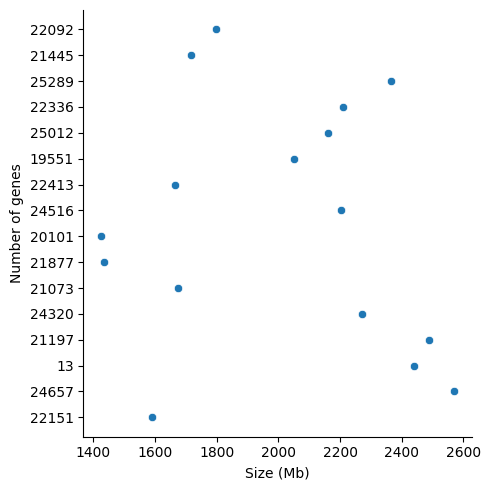

In [14]:
### Relationship plot between genome size and number of genes in Retiles
import seaborn as sns
import matplotlib.pyplot as plt

reptiles_data = euk[euk['Class'] == 'Reptiles']

sns.relplot(x='Size (Mb)', y='Number of genes', data=reptiles_data)

plt.show()

### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [16]:
### Your Code
# gene density = Number of genes / Size (Mb)
# create the new column
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')
euk['Size (Mb)'] = pd.to_numeric(euk['Size (Mb)'], errors='coerce')

euk['Gene Density'] = euk['Number of genes'] / euk['Size (Mb)']

euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Gene Density
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549.0,38554,2013,Scaffold,229.901715
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311.0,48265,2001,Chromosome,320.141390
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847.0,71219,2010,Chromosome,61.127873
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603.0,41939,2011,Chromosome,91.065184
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200.0,37660,2010,Chromosome,37.665284


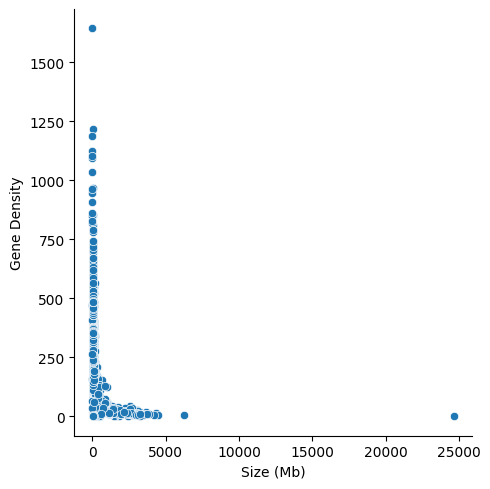

In [19]:
### Create the plot that represents the relation between Size (Mb) and density
# Is it what you expected?
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='Size (Mb)', y='Gene Density', data=euk)

plt.show()

## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

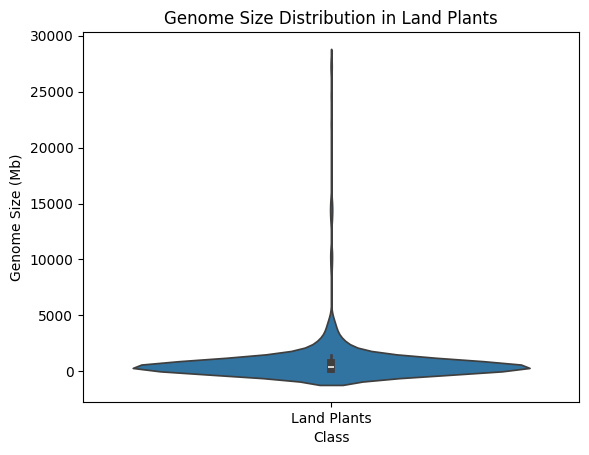

In [21]:
### Your code - Create a violin plot for genome size distribution against Class Land Plants.
import seaborn as sns
import matplotlib.pyplot as plt

land_plants_data = euk[euk['Class'] == 'Land Plants']

sns.violinplot(x='Class', y='Size (Mb)', data=land_plants_data)

plt.title("Genome Size Distribution in Land Plants")
plt.xlabel("Class")
plt.ylabel("Genome Size (Mb)")

plt.show()

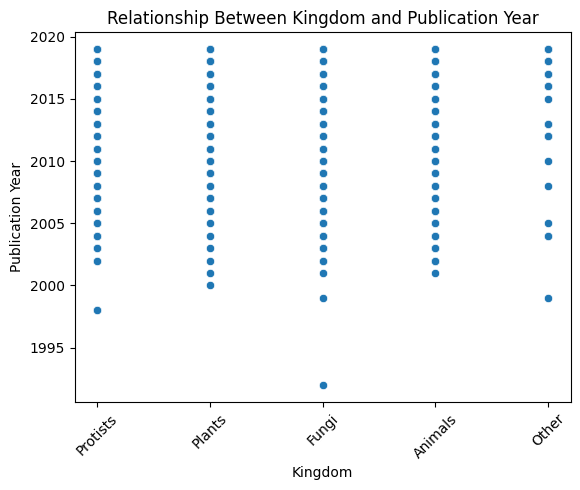

In [23]:
### Your code - Create a scatter plot showing the relationship between Kingdom and Publication year
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
sns.scatterplot(x='Kingdom', y='Publication year', data=euk)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Relationship Between Kingdom and Publication Year")
plt.xlabel("Kingdom")
plt.ylabel("Publication Year")

# Show the plot
plt.show()

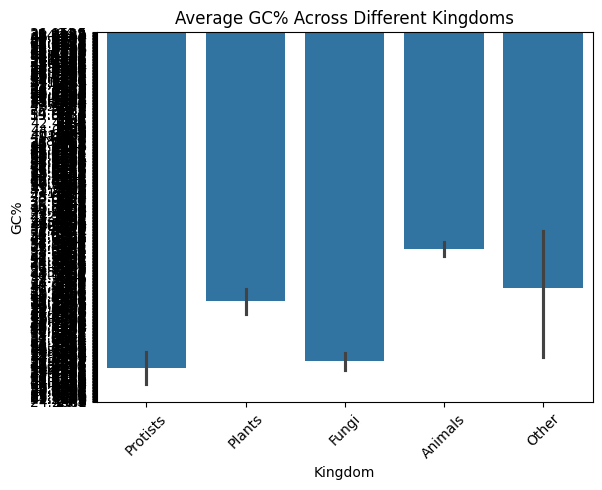

In [24]:
### Your code - Create a bar plot for GC% for each Kingdom
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for GC% per Kingdom
sns.barplot(x='Kingdom', y='GC%', data=euk, estimator=lambda x: sum(x)/len(x))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Average GC% Across Different Kingdoms")
plt.xlabel("Kingdom")
plt.ylabel("GC%")

# Show the plot
plt.show()